In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
%matplotlib inline
plt.style.use('seaborn')

In [2]:
import numpy as np
import sklearn
import matplotlib
import pandas as pd
import sys
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Anaconda custom (64-bit)| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.12.1
Pandas Version: 0.20.3


In [3]:
class card:
    
    def __init__(self, index, suit):
        self.id = index
        self.suit = suit
        self.id_to_name = {2: 'two', 3: 'three', 4:'four', 5:'five', 6:'six', 7:'seven',
                      8: 'eight', 9: 'nine', 10: 'ten', 11: 'jack', 12: 'queen',
                      13: 'king', 14: 'ace'}
        self.suit_to_name = {'H': 'hearts', 'D': 'diamonds', 'C': 'clubs', 'S': 'spades'}
        self.name = str(self.id_to_name[index])+' '+str(self.suit_to_name[suit])       

In [4]:
import random
import copy

class deck:
    
    def __init__(self):
        self.deck = self.build_deck()
        self.final_hand = None
        
    def build_deck(self):
        deck = []
        suits = ['H','D','C','S']
        for suit in suits:
            for idx in range(2,15):
                deck.append(card(idx, suit))
        return deck
    
    def shuffle(self):
        random.shuffle(self.deck)
        
    def deal_five(self):
        self.hand = self.deck[:5]
        self.remaining_cards = self.deck[5:]
    
    def draw_cards(self, ids_to_hold=[], shuffle_remaining=False):
        new_hand = copy.copy(self.hand)            
        remaining_cards = copy.copy(self.remaining_cards)
        
        if shuffle_remaining:
            random.shuffle(remaining_cards)
            
        for i, card in enumerate(new_hand):
            if i not in ids_to_hold:
                new_hand[i] = remaining_cards.pop(0)
        
        self.final_hand = new_hand
    
    def show_hand(self):
        for c in self.hand:
            print(c.name)

In [5]:
from collections import Counter

class jacks_or_better_scorer:
    
    def __init__(self, hand):
        assert len(hand)==5
        self.ids = [x.id for x in hand]
        self.suits = [x.suit for x in hand]
        prs = self.check_for_pairs()
        flsh = self.check_for_flush()
        strt = self.check_for_straight()
        strt_flsh = self.check_straight_flush(strt, flsh)
        self.score = max([prs, flsh, strt, strt_flsh])
        
    def check_for_pairs(self):
        c = Counter(self.ids)
        m = c.most_common()[:2]
        if m[0][1] == 4:
            return 25
        elif m[0][1] == 3 and m[1][1] == 2:
            return 9  
        elif m[0][1] == 3:
            return 3
        elif m[0][1] == 2 and m[1][1] == 2:
            return 2
        elif m[0][1] == 2 and m[0][0] >= 11:
            return 1
        else:
            return 0
        
    def check_for_flush(self): 
        c = Counter(self.suits)
        m = c.most_common()[0][1]
        if m == 5:
            return 6
        else:
            return 0
        
    def check_for_straight(self):
        is_straight = 0
        if 14 in self.ids:
            new_ids = [i if i != 14 else 1 for i in self.ids]
            is_straight += self.straight_helper(new_ids)
        is_straight += self.straight_helper(self.ids)
        
        if is_straight:
            return 4
        else:
            return 0
        
    def straight_helper(self, hand_ids):
        li2 = sorted(hand_ids)
        it=iter(li2[1:])
        if all(int(next(it))-int(i)==1 for i in li2[:-1]):
            return 1
        else:
            return 0
        
    def check_straight_flush(self, strt, flsh):
        if flsh and strt:
            if 13 in self.ids and 14 in self.ids:
                return 800
            else:
                return 50
        else:
            return 0
        

In [159]:
cards = deck()
cards.shuffle()
cards.deal_five()

for c in cards.hand:
    print(c.name)

queen diamonds
five spades
four clubs
jack hearts
four diamonds


#### Hold single Jack or higher card

In [160]:
cards.draw_cards(ids_to_hold=[0], shuffle_remaining=True)
for c in cards.final_hand:
    print(c.name)

queen diamonds
ace spades
nine clubs
king diamonds
jack spades


In [165]:
jack_or_higher = []
for _ in range(1000000):
    cards.draw_cards(ids_to_hold=[0], shuffle_remaining=True)
    jb = jacks_or_better_scorer(cards.final_hand)
    jack_or_higher.append(jb.score)
print("Expected Return: ", np.mean(jack_or_higher))
print("Max Win: ", np.max(jack_or_higher))

Expected Return:  0.466921
Max Win:  800


#### Hold small pair (4s)

In [162]:
cards.draw_cards(ids_to_hold=[2,4], shuffle_remaining=True)
for c in cards.final_hand:
    print(c.name)

queen spades
king diamonds
four clubs
nine clubs
four diamonds


In [166]:
jack_or_higher = []
for _ in range(1000000):
    cards.draw_cards(ids_to_hold=[2,4], shuffle_remaining=True)
    jb = jacks_or_better_scorer(cards.final_hand)
    jack_or_higher.append(jb.score)
print("Expected Return: ", np.mean(jack_or_higher))
print("Max Win: ", np.max(jack_or_higher))

Expected Return:  0.825666
Max Win:  25


#### Now let's simulate each possible "hold" possibility from our initial deal

In [6]:
from itertools import combinations

def combinations(lst, depth, start=0, prepend=[]):
    if depth <= 0:
        yield prepend
    else:
        for i in range(start, len(lst)):
            for c in combinations(lst, depth - 1, i + 1, prepend + [lst[i]]):
                yield c
cards = deck()
cards.deal_five()
possible_hold_combos = []
for i in range(1,6):
    for c in combinations(cards.hand, i):
        possible_hold_combos.append(c)

In [7]:
len(possible_hold_combos)

31

In [8]:
for x in possible_hold_combos:
    for c in x:
        print(c.name)
    print()

two hearts

three hearts

four hearts

five hearts

six hearts

two hearts
three hearts

two hearts
four hearts

two hearts
five hearts

two hearts
six hearts

three hearts
four hearts

three hearts
five hearts

three hearts
six hearts

four hearts
five hearts

four hearts
six hearts

five hearts
six hearts

two hearts
three hearts
four hearts

two hearts
three hearts
five hearts

two hearts
three hearts
six hearts

two hearts
four hearts
five hearts

two hearts
four hearts
six hearts

two hearts
five hearts
six hearts

three hearts
four hearts
five hearts

three hearts
four hearts
six hearts

three hearts
five hearts
six hearts

four hearts
five hearts
six hearts

two hearts
three hearts
four hearts
five hearts

two hearts
three hearts
four hearts
six hearts

two hearts
three hearts
five hearts
six hearts

two hearts
four hearts
five hearts
six hearts

three hearts
four hearts
five hearts
six hearts

two hearts
three hearts
four hearts
five hearts
six hearts



It will be easier to just get a bunch of lists of id's to hold than keep the names though.

In [9]:
cards = deck()
cards.shuffle()
cards.deal_five()

In [10]:
possible_hold_combos = [[]]
for i in range(1,6):
    for c in combinations([0,1,2,3,4], i):
        possible_hold_combos.append(c)

In [11]:
d = {}
for c in possible_hold_combos:
    d[str(c)] = []
    
for combo in possible_hold_combos:
    for _ in range(5000):
        cards.draw_cards(ids_to_hold=combo, shuffle_remaining=True)
        jb = jacks_or_better_scorer(cards.final_hand)
        d[str(combo)].append(jb.score)

In [12]:
cards.show_hand()

eight spades
six diamonds
ace spades
eight diamonds
jack spades


In [13]:
results = []
for c, v in d.items():
    results.append((c,np.mean(v)))

sorted(results, key=lambda x: x[1], reverse=True)

[('[0, 3]', 0.879),
 ('[0, 3, 4]', 0.7036),
 ('[0, 2, 3]', 0.67359999999999998),
 ('[0, 1, 3]', 0.66900000000000004),
 ('[0, 2, 4]', 0.54020000000000001),
 ('[2, 4]', 0.51539999999999997),
 ('[4]', 0.46160000000000001),
 ('[2]', 0.44219999999999998),
 ('[0, 4]', 0.40960000000000002),
 ('[0, 1, 2, 3]', 0.40820000000000001),
 ('[0, 1, 3, 4]', 0.39479999999999998),
 ('[0, 2, 3, 4]', 0.38340000000000002),
 ('[1, 2]', 0.34200000000000003),
 ('[3, 4]', 0.34100000000000003),
 ('[1, 4]', 0.32700000000000001),
 ('[0, 2]', 0.32379999999999998),
 ('[]', 0.31219999999999998),
 ('[1]', 0.29820000000000002),
 ('[2, 3]', 0.29780000000000001),
 ('[1, 2, 4]', 0.29320000000000002),
 ('[2, 3, 4]', 0.28939999999999999),
 ('[1, 3]', 0.26419999999999999),
 ('[3]', 0.24859999999999999),
 ('[0]', 0.22539999999999999),
 ('[0, 1]', 0.20000000000000001),
 ('[0, 1, 2]', 0.1938),
 ('[0, 1, 4]', 0.18720000000000001),
 ('[1, 3, 4]', 0.18440000000000001),
 ('[1, 2, 3]', 0.184),
 ('[1, 2, 3, 4]', 0.13100000000000001),

In [14]:
eval(sorted(results, key=lambda x: x[1], reverse=True)[0][0])

[0, 3]

# Now let's see how it does actually playing and see if it can actually come out ahead.

In [59]:
def play_poker(money, sim_strength=1000, max_count=10000, first_sim_pass=None, return_count=False, return_both=False, verbose=False):
    money = 20
    money_tally = [money]
    count = 0
    while money > 0 and count < max_count:
        count += 1
        money -= 1 
        cards = deck()
        cards.shuffle()
        cards.deal_five()

        d = {}
        for c in possible_hold_combos:
            d[str(c)] = []
        if not first_sim_pass:
            first_sim_pass = sim_strength//10
        
        for combo in possible_hold_combos:
            for i in range(first_sim_pass):
                cards.draw_cards(ids_to_hold=combo, shuffle_remaining=True)
                jb = jacks_or_better_scorer(cards.final_hand)
                d[str(combo)].append(jb.score)
       
        top_five_combos = []
        for c, v in d.items():
            top_five_combos.append([c,np.mean(v)])
        
        top_five_combos = [eval(x[0]) for x in sorted(top_five_combos, key=lambda x: x[1], reverse=True)[:5]]
        
        d = {}
        for c in top_five_combos:
            d[str(c)] = []
        
        for combo in top_five_combos:
            for _ in range(sim_strength):
                cards.draw_cards(ids_to_hold=combo, shuffle_remaining=True)
                jb = jacks_or_better_scorer(cards.final_hand)
                d[str(combo)].append(jb.score)

        results = []
        for c, v in d.items():
            results.append((c,np.mean(v)))

        best_move = eval(sorted(results, key=lambda x: x[1], reverse=True)[0][0])
        cards.draw_cards(ids_to_hold=best_move, shuffle_remaining=True)
        winnings = jacks_or_better_scorer(cards.final_hand).score
        money += winnings
        money_tally.append(money)
        if count%10 == 0 and verbose:
            print("Hand %i, Money: %i"%(count,money))
    if return_both:
        return count, money_tally
    elif return_count:
        return count
    else:
        return money_tally

In [39]:
money_tally = play_poker(20, sim_strength=100, verbose=True)

Hand 10, Money: 24
Hand 20, Money: 24
Hand 30, Money: 26
Hand 40, Money: 22
Hand 50, Money: 19
Hand 60, Money: 17
Hand 70, Money: 27
Hand 80, Money: 50
Hand 90, Money: 51
Hand 100, Money: 45
Hand 110, Money: 39
Hand 120, Money: 38
Hand 130, Money: 29
Hand 140, Money: 25
Hand 150, Money: 22
Hand 160, Money: 19
Hand 170, Money: 17
Hand 180, Money: 28
Hand 190, Money: 21
Hand 200, Money: 17
Hand 210, Money: 9
Hand 220, Money: 11
Hand 230, Money: 5


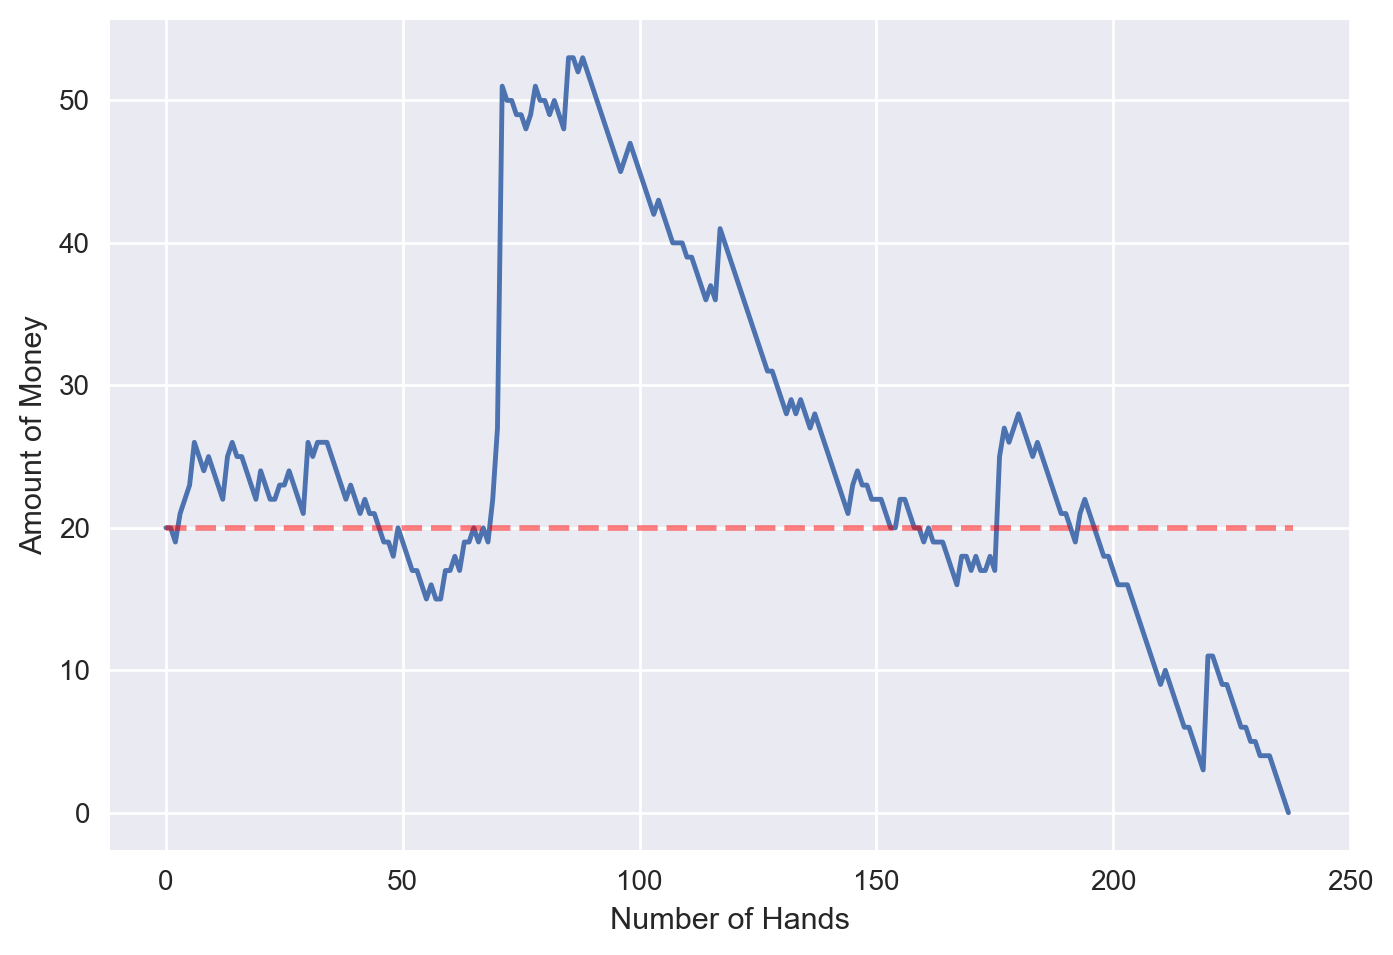

In [40]:
plt.figure(dpi=200)
max_len = len(money_tally)
plt.plot(range(max_len), money_tally);
plt.plot([0,max_len],[20,20],'r--', lw=2, alpha=0.5)
plt.xlabel("Number of Hands")
plt.ylabel("Amount of Money");

## Let's compare this to randomly choosing a combo to hold.

In [41]:
def play_poker_randomly(money, max_count=10000, return_count=False, verbose=False):
    money = 20
    money_tally = [money]
    count = 0
    while money > 0 and count < max_count:
        count += 1
        money -= 1 
        cards = deck()
        cards.shuffle()
        cards.deal_five()

        cards.draw_cards(ids_to_hold=np.random.choice(possible_hold_combos), shuffle_remaining=True)
        winnings = jacks_or_better_scorer(cards.final_hand).score
        money += winnings
        money_tally.append(money)
        if count%10 == 0 and verbose:
            print("Hand %i, Money: %i"%(count,money))
    if return_count:
        return count
    else:
        return money_tally

In [42]:
random_survive = []
for _ in range(100):
    random_survive.append(play_poker_randomly(20, max_count=100, return_count=True))

In [44]:
smart_survive = []
for play_num in range(100):
    print("Player Num: ", play_num)
    smart_survive.append(play_poker(20, max_count=100, sim_strength=100, return_count=True))

Player Num:  0
Player Num:  1
Player Num:  2
Player Num:  3
Player Num:  4
Player Num:  5
Player Num:  6
Player Num:  7
Player Num:  8
Player Num:  9
Player Num:  10
Player Num:  11
Player Num:  12
Player Num:  13
Player Num:  14
Player Num:  15
Player Num:  16
Player Num:  17
Player Num:  18
Player Num:  19
Player Num:  20
Player Num:  21
Player Num:  22
Player Num:  23
Player Num:  24
Player Num:  25
Player Num:  26
Player Num:  27
Player Num:  28
Player Num:  29
Player Num:  30
Player Num:  31
Player Num:  32
Player Num:  33
Player Num:  34
Player Num:  35
Player Num:  36
Player Num:  37
Player Num:  38
Player Num:  39
Player Num:  40
Player Num:  41
Player Num:  42
Player Num:  43
Player Num:  44
Player Num:  45
Player Num:  46
Player Num:  47
Player Num:  48
Player Num:  49
Player Num:  50
Player Num:  51
Player Num:  52
Player Num:  53
Player Num:  54
Player Num:  55
Player Num:  56
Player Num:  57
Player Num:  58
Player Num:  59
Player Num:  60
Player Num:  61
Player Num:  62
Pl

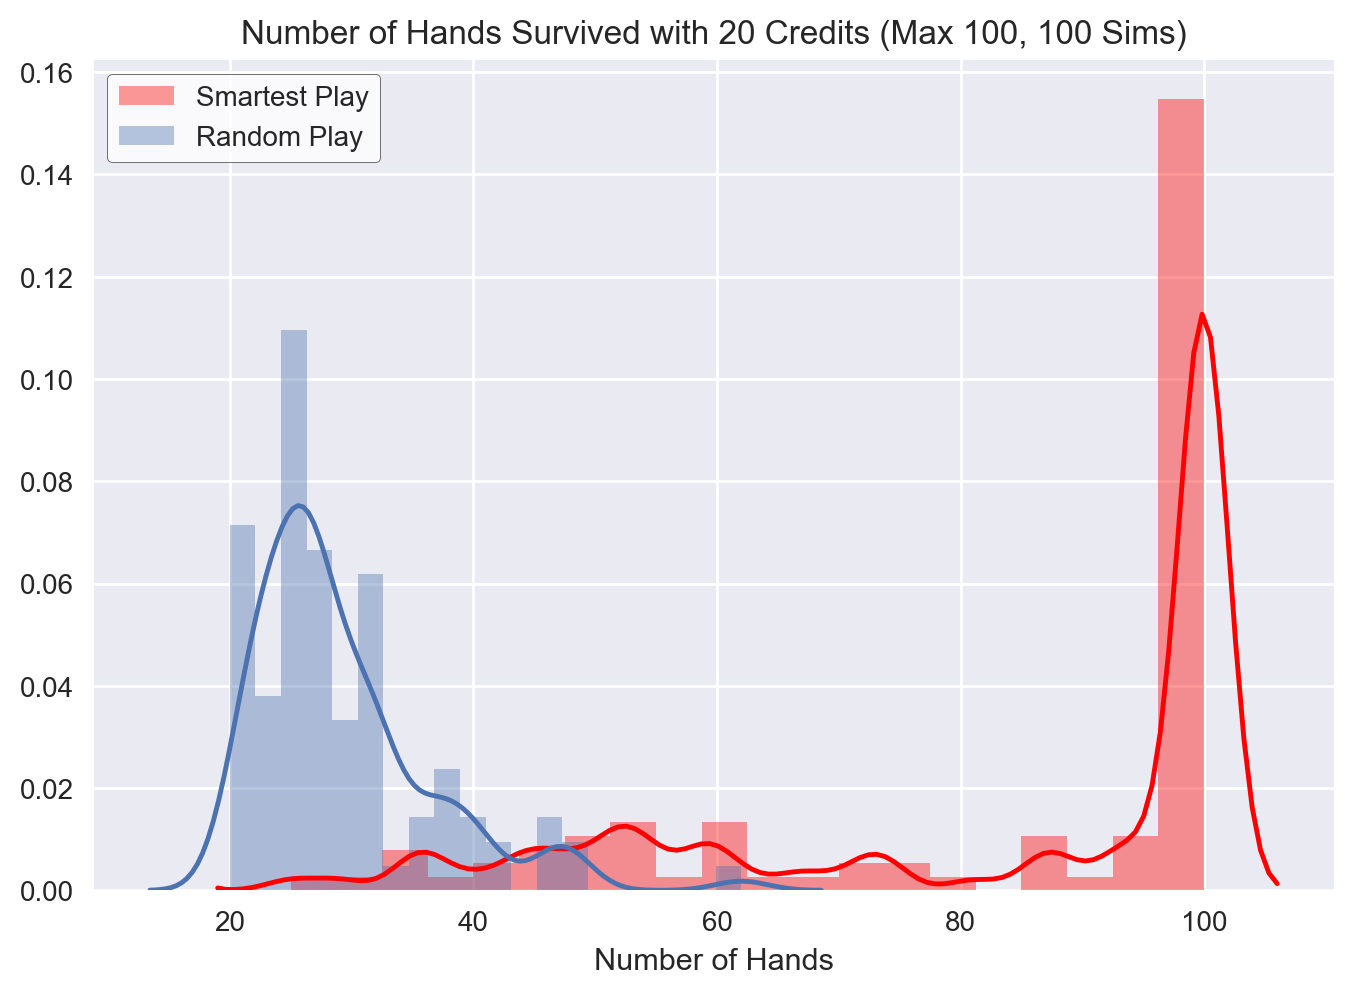

In [54]:
import seaborn as sns
plt.figure(dpi=200)
sns.distplot(smart_survive, color='r', label="Smartest Play", bins=20, kde_kws={"bw":2});
sns.distplot(random_survive, label="Random Play", bins=20);
plt.legend(loc='upper left', frameon=True, facecolor='#FFFFFF', edgecolor='#333333');
plt.title("Number of Hands Survived with 20 Credits (Max 100, 100 Sims)");
plt.xlabel("Number of Hands");

In [60]:
smart_survive_2 = []
for play_num in range(100):
    if play_num%10==0:
        print("Player Num: ", play_num)
    smart_survive_2.append(play_poker(20, max_count=500, sim_strength=100, first_sim_pass=15, return_count=True))

Player Num:  0
Player Num:  10
Player Num:  20
Player Num:  30
Player Num:  40
Player Num:  50
Player Num:  60
Player Num:  70
Player Num:  80
Player Num:  90


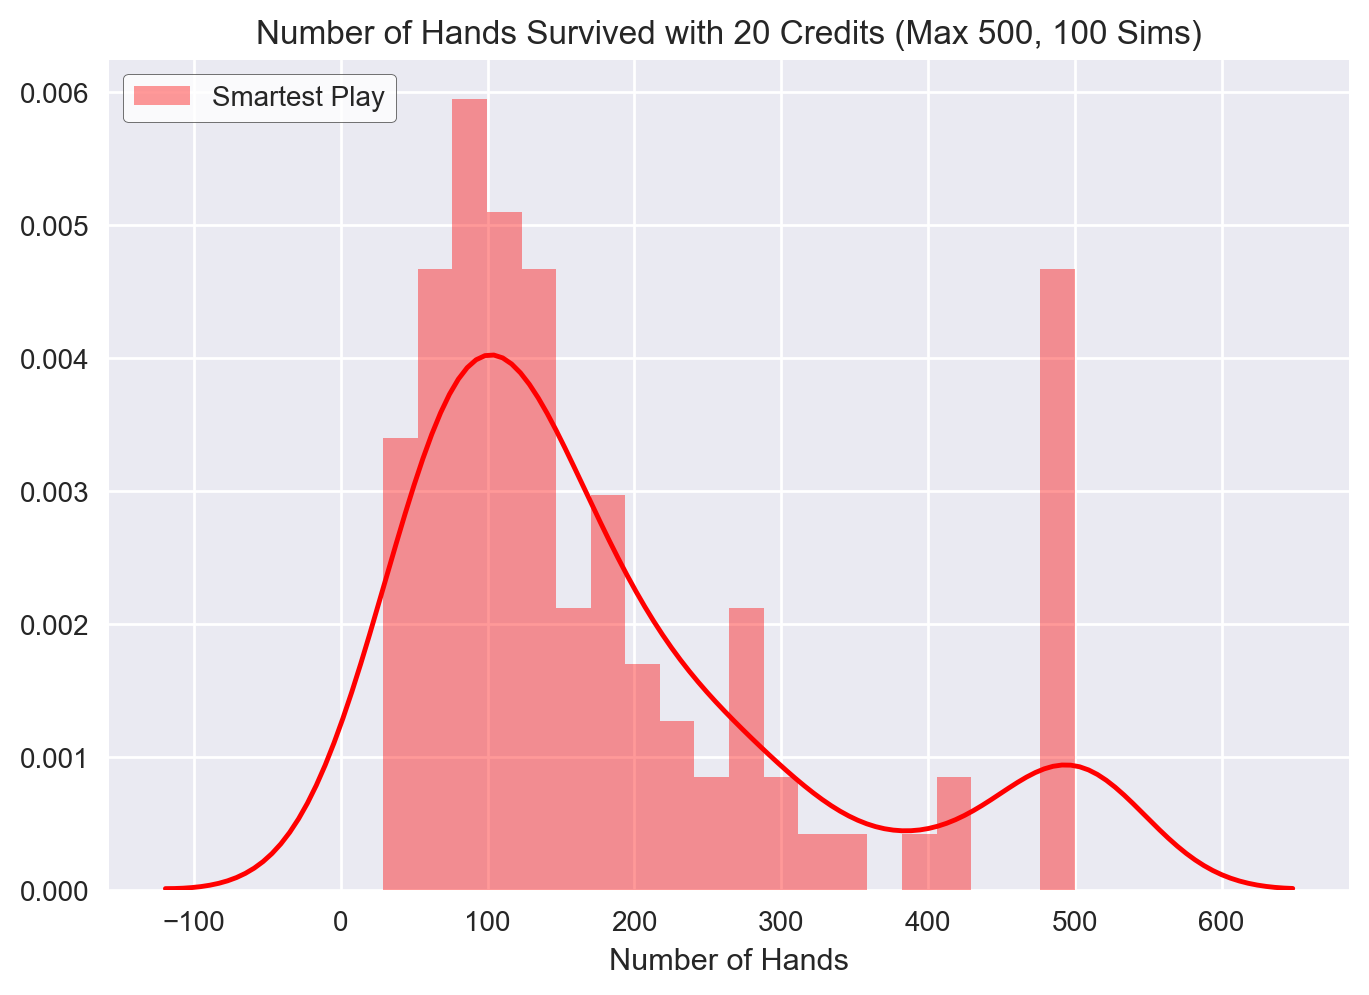

In [61]:
plt.figure(dpi=200)
sns.distplot(smart_survive_2, color='r', label="Smartest Play", bins=20);
plt.legend(loc='upper left', frameon=True, facecolor='#FFFFFF', edgecolor='#333333');
plt.title("Number of Hands Survived with 20 Credits (Max 500, 100 Sims)");
plt.xlabel("Number of Hands");

In [ ]:
smart_survive_3 = []
smart_tally_3 = []
for player_num in range(100):
    print("Player ", player_num)
    i,j = play_poker(20, max_count=1000, sim_strength=200, return_both=True)
    smart_survive_3.append(i)
    smart_tally_3.append(j)

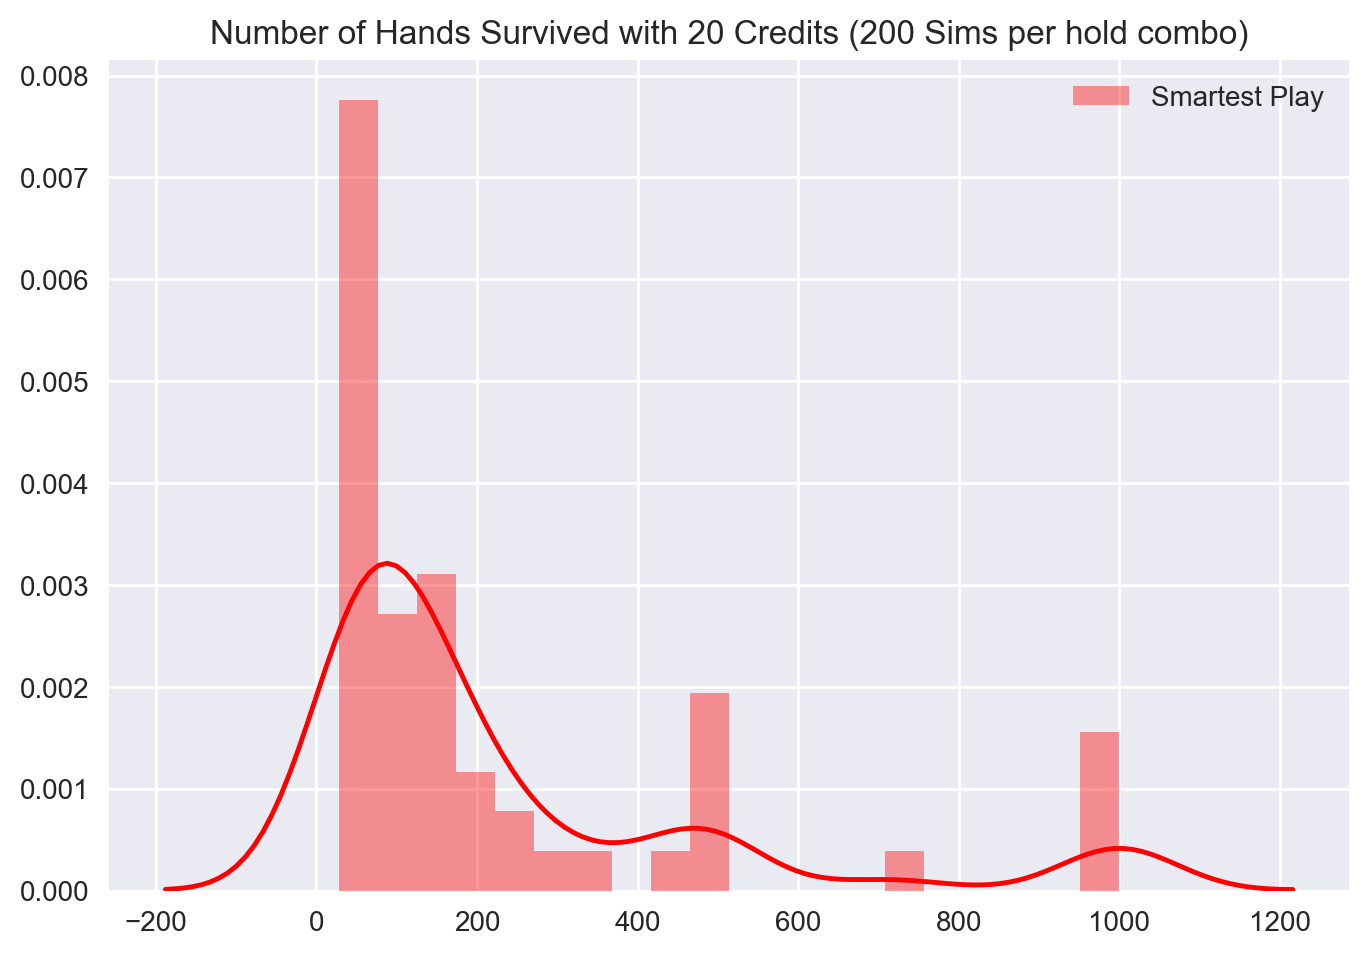

In [301]:
plt.figure(dpi=200)
sns.distplot(smart_survive_3, color='r', label="Smartest Play", bins=20);
plt.legend(loc='upper right');
plt.title("Number of Hands Survived with 20 Credits (200 Sims per hold combo)");

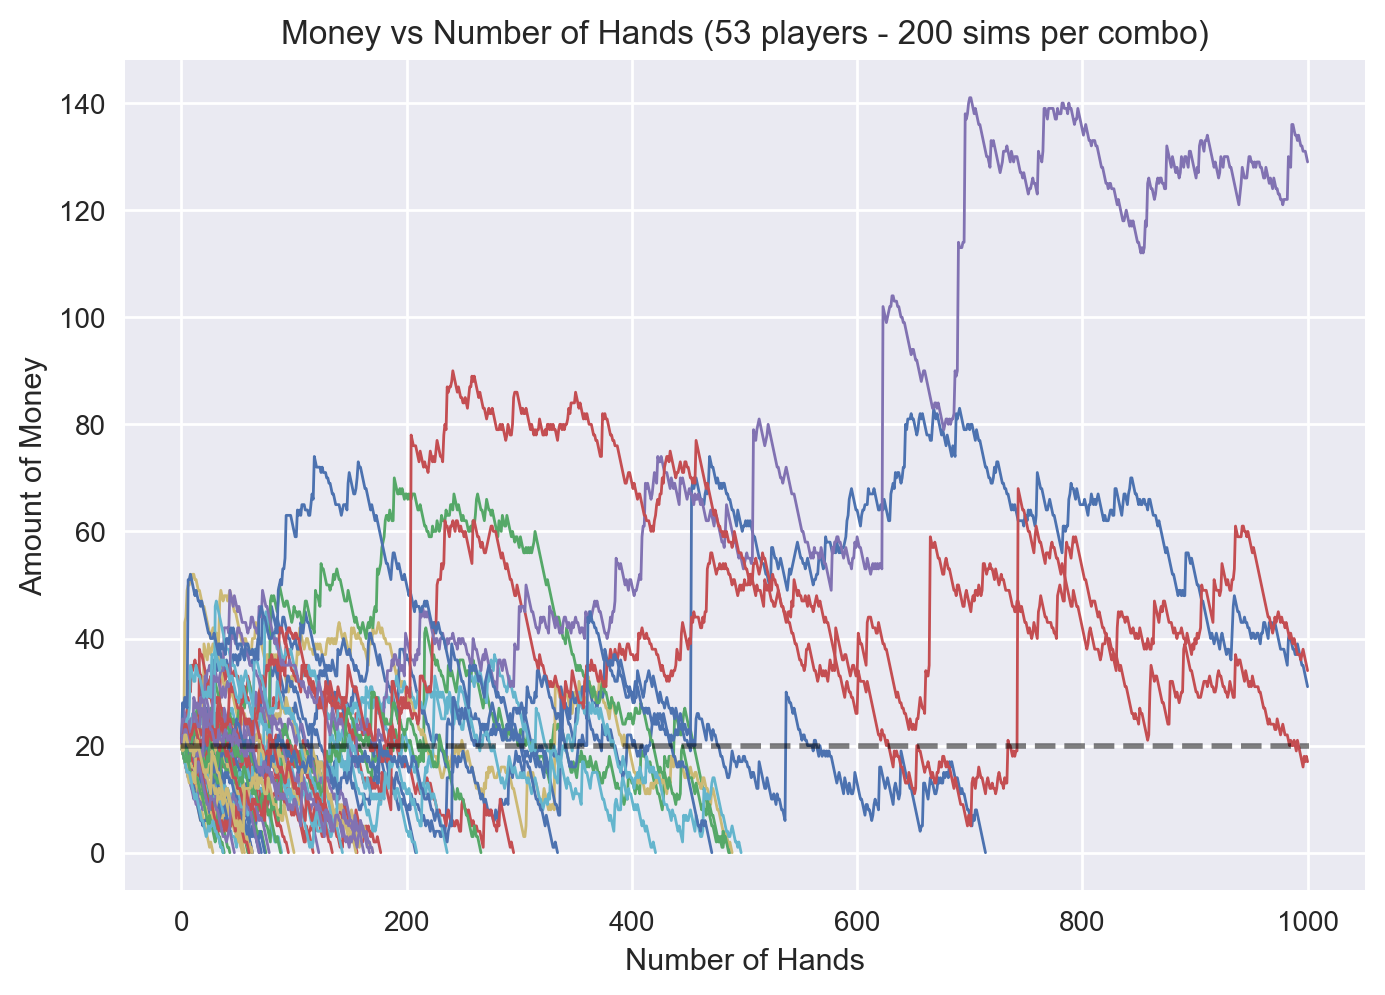

In [302]:
max_max_len = 0
plt.figure(dpi=200)
plt.xlabel("Number of Hands")
plt.ylabel("Amount of Money");
plt.title("Money vs Number of Hands (53 players - 200 sims per combo)")
for money_tally in smart_tally_3:
    max_len = len(money_tally)
    if max_len > max_max_len:
        max_max_len = max_len
    plt.plot(range(max_len), money_tally, lw=1);
plt.plot([0,max_max_len],[20,20],'k--', lw=2, alpha=0.5);

In [307]:
total_survivors = 0
total_profitors = 0
for x in smart_tally_3:
    if len(x) == 1001:
        total_survivors += 1
        if x[-1] > 20:
            total_profitors += 1
            
print("Percent lasting 1000 hands: ", str(round(total_survivors/len(smart_tally_3),3)))
print("Percent with profit after 1000 hands: ", str(round(total_profitors/len(smart_tally_3),3)))

Percent lasting 1000 hands:  0.075
Percent with profit after 1000 hands:  0.057


# Compare optimized with non-optimized result

In [94]:
def speed_optimized_best_play(cards, sim_strength=1000, max_count=10000, first_sim_pass=None,):
    d = {}
    for c in possible_hold_combos:
        d[str(c)] = []
    if not first_sim_pass:
        first_sim_pass = sim_strength//10

    for combo in possible_hold_combos:
        for i in range(first_sim_pass):
            cards.draw_cards(ids_to_hold=combo, shuffle_remaining=True)
            jb = jacks_or_better_scorer(cards.final_hand)
            d[str(combo)].append(jb.score)

    top_five_combos = []
    for c, v in d.items():
        top_five_combos.append([c,np.mean(v)])

    top_five_combos = [eval(x[0]) for x in sorted(top_five_combos, key=lambda x: x[1], reverse=True)[:5]]

    d = {}
    for c in top_five_combos:
        d[str(c)] = []

    for combo in top_five_combos:
        for _ in range(sim_strength):
            cards.draw_cards(ids_to_hold=combo, shuffle_remaining=True)
            jb = jacks_or_better_scorer(cards.final_hand)
            d[str(combo)].append(jb.score)

    results = []
    for c, v in d.items():
        results.append((c,np.mean(v)))
    #print("BEST: ",sorted(results, key=lambda x: x[1], reverse=True)[:3])
    best_move = [eval(x[0]) for x in sorted(results, key=lambda x: x[1], reverse=True)[:5]]
    return best_move

In [95]:
def simple_best_play(cards, sim_strength=1000):
    d = {}
    for c in possible_hold_combos:
        d[str(c)] = []

    for combo in possible_hold_combos:
        for i in range(sim_strength):
            cards.draw_cards(ids_to_hold=combo, shuffle_remaining=True)
            jb = jacks_or_better_scorer(cards.final_hand)
            d[str(combo)].append(jb.score)

    results = []
    for c, v in d.items():
        results.append((c,np.mean(v)))

    best_move = eval(sorted(results, key=lambda x: x[1], reverse=True)[0][0])
    return best_move

In [99]:
same = 0
top5 = 0
iters = 500
for i in range(iters):
    cards = deck()
    cards.shuffle()
    cards.deal_five()
    so_best = speed_optimized_best_play(cards, sim_strength=500)
    smp_best = simple_best_play(cards, sim_strength=500)
    #print(smp_best)
    if smp_best in so_best:
        top5+=1
        if so_best[0] == smp_best:
            same+=1
print("Exactly equal: ",same/iters)
print("In Top 5: ",top5/iters)

Exactly equal:  0.592
In Top 5:  0.788
